In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd


config = json.load(open("crb_validation_config.json"))
subcarrier_spacing = config.get("subcarrier_spacing")
subcarrier_num = config.get("subcarrier_num")
num_time_steps = config.get("num_time_steps")
ebno_db = config.get("ebno_db")
num_samples = config.get("num_samples")
batch_size = config.get("batch_size")
max_depth = config.get("max_depth")
step = config.get("step")
los = config.get("los")
reflection = config.get("reflection")
scattering = config.get("scattering")
diffraction = config.get("diffraction")
edge_diffraction = config.get("edge_diffraction")

scene_info = [
    {
        "scene_name":"indoor", # 场景名称
        "paths":"./scenes/Indoor/indoor.xml", # 场景路径
        "tgpath":"meshes/human.ply", # 目标路径
        "tgmat":"itu_plywood", # 目标材质
        "tgname":"human", # 目标名称
        "tgpos":[[-3,2,0],[-3,-1.5,0],[3,-2,0],[3,2,0]], # 目标位置
        "tgscales":[[1,1,1],[1,1,1],[1,1,1],[1,1,1]], # 目标缩放
        "tgrots":[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]], # 目标旋转
        "tgvs":[[0,0,0],[0,0,0],[0,0,0],[0,0,0]], # 目标速度
        "map_center":[0,0,2.95],
        "map_size_x":10,
        "map_size_y":6,
        "cell_size":0.2,
    },
    # {
    #     "scene_name":"street", # 场景名称
    #     "paths":"./scenes/Street/street.xml", # 场景路径
    #     "tgpath":"meshes/car.ply", # 目标路径
    #     "tgmat":"itu_metal", # 目标材质
    #     "tgname":"car", # 目标名称
    #     "tgpos":[[0,0,0],[-14,28,0],[14,28,0]], # 目标位置
    #     "tgscales":[[1,1,1],[1,1,1]], # 目标缩放
    #     "tgrots":[[0,0,0,0],[0,0,0,0]], # 目标旋转
    #     "tgvs":[[0,10,0],[0,10,0],[0,10,0]], # 目标速度
    #     "cell_pos":[[0,0,6],[-20,27,6],[20,27,6],[20,-27,6],[-20,-27,6],[-10,-27,6],[-10,-8,6]], # 位置信息
    # }
]


def getRayType():
    ray_type=""
    if los:
        ray_type += "T"
    else:
        ray_type += "F"
    if reflection:
        ray_type += "T"
    else:
        ray_type += "F"
    if scattering:
        ray_type += "T"
    else:
        ray_type += "F"
    if diffraction:
        ray_type += "T"
    else:
        ray_type += "F"
    if edge_diffraction:
        ray_type += "T"
    else:
        ray_type += "F"
    return ray_type



Text(0.5, 1.0, 'mean=302.02,per=0.64')

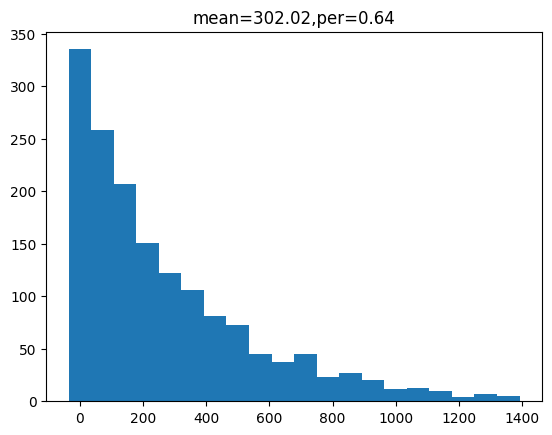

In [13]:
tg_num = 3
info = scene_info[0]
scene_name = info.get("scene_name")
scene_path = info.get("paths")
map_center = info.get("map_center")
x = info.get("map_size_x")
y = info.get("map_size_y")
cell_size = info.get("cell_size")
tgname = info.get("tgname")
tgvs = info.get("tgvs")
tgpos = info.get("tgpos")
ray_type = getRayType()
title = f"./Data/{scene_name}/{tgname}/{tgpos[tg_num]}/{tgvs[tg_num]}/{num_samples}-{ray_type}-{max_depth}-{x}-{y}-{cell_size}"

mse = np.load(f"{title}/mse_{step}.npy")
crb = np.load(f"{title}/crb_{batch_size}.npy")
# mask_greater = np.where(mse>=1)
# mask_less = np.where(mse<1)
# mse[mask_greater] = np.max(mse[mask_less])
# mask_zero = np.where(crb==0)
# crb[mask_zero] = 1e-7

# 排序并得到索引
mse_sort = np.argsort(mse)
crb_sort = np.argsort(crb)

# 做差取平均
diff = mse_sort - crb_sort
diff = np.abs(diff)

# 做频率直方图
hist = np.histogram(diff, bins=20)
plt.bar(hist[1][:-1], hist[0], width=hist[1][1]-hist[1][0])
per = len(np.where(diff<=len(diff)/5)[0])/len(diff)
mean = np.mean(diff)
plt.title(f"rank difference histogram,\nmean={mean}, per={per}")